# STEP 1 : Data Analysis

In [1]:
import math
import IPython
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing, decomposition, discriminant_analysis, tree

pd.options.display.max_columns = None

In [2]:
raw_train_credit_application = pd.read_csv('data/application_train.csv')
raw_test_credit_application = pd.read_csv('data/application_test.csv')

raw_bureau = pd.read_csv('data/bureau.csv')
raw_bureau_balance = pd.read_csv('data/bureau_balance.csv')
raw_credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
raw_installments_payments = pd.read_csv('data/installments_payments.csv')
raw_pos_cash_balance = pd.read_csv('data/pos_cash_balance.csv')
raw_previous_application = pd.read_csv('data/previous_application.csv')

# STEP 2 : Data Collection

In [3]:
train_SK_ID_CURR = raw_train_credit_application['SK_ID_CURR'].unique()
test_SK_ID_CURR = raw_test_credit_application['SK_ID_CURR'].unique()

In [4]:
add_columns = [
    'SK_ID_CURR',
    
    'BUR_credit_active',
    'BUR_credit_closed',
    'BUR_credit_sold',
    'BUR_credit_bad_debt',
    'BUR_sum_credit_day_overdue',
    'BUR_mean_credit_day_overdue',
    'BUR_credit_type_count',
    'BUR_mean_days_credit_update',
    'PREV_application_count',
    'PREV_name_contract_type_count',
    'PREV_mean_amount_credit',
    'PREV_name_contract_status_approved_count',
]

add_train_credit_application = []
index = 0
for SK_ID_CURR in train_SK_ID_CURR:
    if index % 10000 == 0:
        print(index, time.time())
    
    # BUREAU
    bureau_SK_ID_CURR = raw_bureau.loc[raw_bureau['SK_ID_CURR'] == SK_ID_CURR]
    
    credit_active_value_counts = bureau_SK_ID_CURR['CREDIT_ACTIVE'].value_counts()
    BUR_credit_active = credit_active_value_counts['Active'] if 'Active' in credit_active_value_counts else 0
    BUR_credit_closed = credit_active_value_counts['Closed'] if 'Closed' in credit_active_value_counts else 0
    BUR_credit_sold = credit_active_value_counts['Sold'] if 'Sold' in credit_active_value_counts else 0
    BUR_credit_bad_debt = credit_active_value_counts['Bad Debt'] if 'Bad Debt' in credit_active_value_counts else 0
    
    BUR_sum_credit_day_overdue = bureau_SK_ID_CURR['CREDIT_DAY_OVERDUE'].sum()
    BUR_mean_credit_day_overdue = bureau_SK_ID_CURR['CREDIT_DAY_OVERDUE'].mean()
    
    BUR_credit_type_count = bureau_SK_ID_CURR['CREDIT_TYPE'].value_counts().count()
    
    BUR_mean_days_credit_update = bureau_SK_ID_CURR['DAYS_CREDIT_UPDATE'].mean()
    
    
    # PREVIOUS APPLICATION
    prev_SK_ID_CURR = raw_previous_application.loc[raw_previous_application['SK_ID_CURR'] == SK_ID_CURR]
    
    PREV_application_count = prev_SK_ID_CURR['SK_ID_PREV'].count()
    PREV_name_contract_type_count = prev_SK_ID_CURR['NAME_CONTRACT_TYPE'].value_counts().count()
    PREV_mean_amount_credit = prev_SK_ID_CURR['AMT_CREDIT'].mean()
    PREV_name_contract_status_value_counts = prev_SK_ID_CURR['NAME_CONTRACT_STATUS'].value_counts()
    PREV_name_contract_status_approved_count = PREV_name_contract_status_value_counts['Approved'] if 'Approved' in PREV_name_contract_status_value_counts else 0
    
    
    # Add a new row
    add_train_credit_application.append([SK_ID_CURR, 
                                         BUR_credit_active,
                                         BUR_credit_closed,
                                         BUR_credit_sold,
                                         BUR_credit_bad_debt,
                                         BUR_sum_credit_day_overdue,
                                         BUR_mean_credit_day_overdue,
                                         BUR_credit_type_count,
                                         BUR_mean_days_credit_update,
                                         PREV_application_count,
                                         PREV_name_contract_type_count,
                                         PREV_mean_amount_credit,
                                         PREV_name_contract_status_approved_count,
                                        ])
    
    index = index + 1

add_train_credit_application = pd.DataFrame(add_train_credit_application, columns=add_columns)

0 1529044831.6637876
10000 1529044944.1650555
20000 1529045036.9228985
30000 1529045136.2361214
40000 1529045236.1722243
50000 1529045352.6393695
60000 1529045472.748871
70000 1529045596.0022287
80000 1529045715.9504466
90000 1529045836.9347324
100000 1529045960.8009305
110000 1529046081.5066643
120000 1529046195.8565793
130000 1529046294.1920667
140000 1529046400.8572702
150000 1529046524.1785314
160000 1529046640.7028935
170000 1529046758.9431214
180000 1529046886.0057232
190000 1529047003.8897533
200000 1529047136.476108
210000 1529047256.798162
220000 1529047373.8688397
230000 1529047508.7418797
240000 1529047610.3446987
250000 1529047722.3063014
260000 1529047837.2914083
270000 1529047946.465321
280000 1529048066.2305632
290000 1529048195.877214
300000 1529048321.3676183


In [6]:
add_test_credit_application = []
index = 0
for SK_ID_CURR in test_SK_ID_CURR:
    if index % 10000 == 0:
        print(index, time.time())
    
    # BUREAU
    bureau_SK_ID_CURR = raw_bureau.loc[raw_bureau['SK_ID_CURR'] == SK_ID_CURR]
    
    credit_active_value_counts = bureau_SK_ID_CURR['CREDIT_ACTIVE'].value_counts()
    BUR_credit_active = credit_active_value_counts['Active'] if 'Active' in credit_active_value_counts else 0
    BUR_credit_closed = credit_active_value_counts['Closed'] if 'Closed' in credit_active_value_counts else 0
    BUR_credit_sold = credit_active_value_counts['Sold'] if 'Sold' in credit_active_value_counts else 0
    BUR_credit_bad_debt = credit_active_value_counts['Bad Debt'] if 'Bad Debt' in credit_active_value_counts else 0
    
    BUR_sum_credit_day_overdue = bureau_SK_ID_CURR['CREDIT_DAY_OVERDUE'].sum()
    BUR_mean_credit_day_overdue = bureau_SK_ID_CURR['CREDIT_DAY_OVERDUE'].mean()
    
    BUR_credit_type_count = bureau_SK_ID_CURR['CREDIT_TYPE'].value_counts().count()
    
    BUR_mean_days_credit_update = bureau_SK_ID_CURR['DAYS_CREDIT_UPDATE'].mean()
    
    
    # PREVIOUS APPLICATION
    prev_SK_ID_CURR = raw_previous_application.loc[raw_previous_application['SK_ID_CURR'] == SK_ID_CURR]
    
    PREV_application_count = prev_SK_ID_CURR['SK_ID_PREV'].count()
    PREV_name_contract_type_count = prev_SK_ID_CURR['NAME_CONTRACT_TYPE'].value_counts().count()
    PREV_mean_amount_credit = prev_SK_ID_CURR['AMT_CREDIT'].mean()
    PREV_name_contract_status_value_counts = prev_SK_ID_CURR['NAME_CONTRACT_STATUS'].value_counts()
    PREV_name_contract_status_approved_count = PREV_name_contract_status_value_counts['Approved'] if 'Approved' in PREV_name_contract_status_value_counts else 0
    
    
    # Add a new row
    add_test_credit_application.append([SK_ID_CURR, 
                                         BUR_credit_active,
                                         BUR_credit_closed,
                                         BUR_credit_sold,
                                         BUR_credit_bad_debt,
                                         BUR_sum_credit_day_overdue,
                                         BUR_mean_credit_day_overdue,
                                         BUR_credit_type_count,
                                         BUR_mean_days_credit_update,
                                         PREV_application_count,
                                         PREV_name_contract_type_count,
                                         PREV_mean_amount_credit,
                                         PREV_name_contract_status_approved_count,
                                        ])
    
    index = index + 1
    
add_test_credit_application = pd.DataFrame(add_test_credit_application, columns=add_columns)

0 1529048485.876343
10000 1529048612.4811
20000 1529048736.7073596
30000 1529048863.3124702
40000 1529048962.5626853


In [7]:
collected_train_credit_application = pd.merge(left=raw_train_credit_application, right=add_train_credit_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='outer')
collected_test_credit_application = pd.merge(left=raw_test_credit_application, right=add_test_credit_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='outer')

In [8]:
collected_train_credit_application.to_pickle('collected_train_credit_application')
collected_test_credit_application.to_pickle('collected_test_credit_application')

In [ ]:
raw_train_credit_application = raw_test_credit_application = raw_bureau = raw_bureau_balance = raw_credit_card_balance = raw_installments_payments = raw_pos_cash_balance = raw_previous_application = None

# Load Data

In [3]:
collected_train_credit_application = pd.read_pickle('collected_train_credit_application')
collected_test_credit_application = pd.read_pickle('collected_test_credit_application')

# STEP 3 : Data Cleaning

In [4]:
non_features = ['SK_ID_CURR', 'TARGET']

all_features = list(set(collected_train_credit_application.columns.values.tolist()) - set(non_features))

categorical_features = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
                        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                        'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 
                        'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 
                        'EMERGENCYSTATE_MODE',
                       ]

flag_features = ['CODE_GENDER', 
                 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 
                 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 
                 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
                 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
                 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
                 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                 'REG_REGION_NOT_LIVE_REGIONREG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
                 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                 'LIVE_CITY_NOT_WORK_CITY',
                ]

numerical_features = list(set(all_features) - set(non_features) - set(categorical_features) - set(flag_features))

In [5]:
def fill_missing_data(df, train_df=None):
    if df is None:
        return None
    
    new_df = df.copy()
    new_train_df = train_df.copy() if train_df is not None else None
    
    median_comp_df = new_train_df if new_train_df is not None else new_df
    for col in new_df.columns.values:
        if new_df[col].dtype == np.float or new_df[col].dtype == np.int:
            new_df[col] = new_df[col].fillna(median_comp_df[col].median())
        elif new_df[col].dtype == np.object:
            new_df[col] = new_df[col].fillna(median_comp_df[col].value_counts().idxmax())
    
    return new_df

def handle_outlier(df):
    if df is None:
        return None
    
    new_df = df.copy()
    
    # new_df['SK_ID_CURR'] = new_df['SK_ID_CURR']
    # if 'TARGET' in new_df:
    #     new_df['TARGET'] = new_df['TARGET']
    # new_df['NAME_CONTRACT_TYPE'] = new_df['NAME_CONTRACT_TYPE']
    new_df['CODE_GENDER'] = new_df['CODE_GENDER'].apply(lambda val: 1 if val == 'XNA' or val == 'F' else 0)
    new_df['FLAG_OWN_CAR'] = new_df['FLAG_OWN_CAR'].apply(lambda val: 1 if val == 'N' else 1)
    new_df['FLAG_OWN_REALTY'] = new_df['FLAG_OWN_REALTY'].apply(lambda val: 1 if val == 'N' else 1)
    new_df['CNT_CHILDREN'] = new_df['CNT_CHILDREN'].apply(lambda val: 3 if val > 3 else val)
    new_df['AMT_INCOME_TOTAL'] = new_df['AMT_INCOME_TOTAL'].apply(lambda val: 500000 if val > 500000 else val)
    new_df['AMT_CREDIT'] = new_df['AMT_CREDIT'].apply(lambda val: 1800000 if val > 1800000 else val)
    new_df['AMT_ANNUITY'] = new_df['AMT_ANNUITY'].apply(lambda val: 100000 if val > 100000 else val)
    new_df['AMT_GOODS_PRICE'] = new_df['AMT_GOODS_PRICE'].apply(lambda val: 2500000 if val > 2500000 else val)
    # new_df['NAME_TYPE_SUITE'] = new_df['NAME_TYPE_SUITE']
    # new_df['NAME_INCOME_TYPE'] = new_df['NAME_INCOME_TYPE']
    # new_df['NAME_EDUCATION_TYPE'] = new_df['NAME_EDUCATION_TYPE']
    new_df['NAME_FAMILY_STATUS'] = new_df['NAME_FAMILY_STATUS'].apply(lambda val: 'Married' if val == 'Unknown' else val)
    # new_df['NAME_HOUSING_TYPE'] = new_df['NAME_HOUSING_TYPE']
    # new_df['REGION_POPULATION_RELATIVE'] = new_df['REGION_POPULATION_RELATIVE']
    # new_df['DAYS_BIRTH'] = new_df['DAYS_BIRTH']
    new_df['DAYS_EMPLOYED'] = new_df['DAYS_EMPLOYED'].apply(lambda val: 0 if val > 0 else val)
    new_df['DAYS_REGISTRATION'] = new_df['DAYS_REGISTRATION'].apply(lambda val: -18000 if val < -18000 else val)
    new_df['DAYS_ID_PUBLISH'] = new_df['DAYS_ID_PUBLISH'].apply(lambda val: -6300 if val < -6300 else val)
    new_df['OWN_CAR_AGE'] = new_df['OWN_CAR_AGE'].apply(lambda val: 65 if val > 65 else val)
    # new_df['FLAG_MOBIL'] = new_df['FLAG_MOBIL']
    # new_df['FLAG_EMP_PHONE'] = new_df['FLAG_EMP_PHONE']
    # new_df['FLAG_WORK_PHONE'] = new_df['FLAG_WORK_PHONE']
    # new_df['FLAG_CONT_MOBILE'] = new_df['FLAG_CONT_MOBILE']
    # new_df['FLAG_PHONE'] = new_df['FLAG_PHONE']
    # new_df['FLAG_EMAIL'] = new_df['FLAG_EMAIL']
    # new_df['OCCUPATION_TYPE'] = new_df['OCCUPATION_TYPE']
    # new_df['CNT_FAM_MEMBERS'] = new_df['CNT_FAM_MEMBERS']
    # new_df['REGION_RATING_CLIENT'] = new_df['REGION_RATING_CLIENT']
    # new_df['REGION_RATING_CLIENT_W_CITY'] = new_df['REGION_RATING_CLIENT_W_CITY']
    # new_df['WEEKDAY_APPR_PROCESS_START'] = new_df['WEEKDAY_APPR_PROCESS_START']
    # new_df['HOUR_APPR_PROCESS_START'] = new_df['HOUR_APPR_PROCESS_START']
    # new_df['REG_REGION_NOT_LIVE_REGION'] = new_df['REG_REGION_NOT_LIVE_REGION']
    # new_df['REG_REGION_NOT_WORK_REGION'] = new_df['REG_REGION_NOT_WORK_REGION']
    # new_df['LIVE_REGION_NOT_WORK_REGION'] = new_df['LIVE_REGION_NOT_WORK_REGION']
    # new_df['REG_CITY_NOT_LIVE_CITY'] = new_df['REG_CITY_NOT_LIVE_CITY']
    # new_df['REG_CITY_NOT_WORK_CITY'] = new_df['REG_CITY_NOT_WORK_CITY']
    # new_df['LIVE_CITY_NOT_WORK_CITY'] = new_df['LIVE_CITY_NOT_WORK_CITY']
    new_df['ORGANIZATION_TYPE'] = new_df['ORGANIZATION_TYPE'].apply(lambda val: 'Unknown' if val == 'XNA' else val)
    # new_df['EXT_SOURCE_1'] = new_df['EXT_SOURCE_1']
    # new_df['EXT_SOURCE_2'] = new_df['EXT_SOURCE_2']
    # new_df['EXT_SOURCE_3'] = new_df['EXT_SOURCE_3']
    # new_df['APARTMENTS_AVG'] = new_df['APARTMENTS_AVG']
    new_df['BASEMENTAREA_AVG'] = new_df['BASEMENTAREA_AVG'].apply(lambda val: 0.5 if val > 0.5 else val)
    new_df['YEARS_BEGINEXPLUATATION_AVG'] = new_df['YEARS_BEGINEXPLUATATION_AVG'].apply(lambda val: 0.9 if val < 0.9 else val)
    # new_df['YEARS_BUILD_AVG'] = new_df['YEARS_BUILD_AVG']
    new_df['COMMONAREA_AVG'] = new_df['COMMONAREA_AVG'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['ELEVATORS_AVG'] = new_df['ELEVATORS_AVG'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['ENTRANCES_AVG'] = new_df['ENTRANCES_AVG'].apply(lambda val: 0.5 if val > 0.5 else val)
    # new_df['FLOORSMAX_AVG'] = new_df['FLOORSMAX_AVG']
    # new_df['FLOORSMIN_AVG'] = new_df['FLOORSMIN_AVG']
    new_df['LANDAREA_AVG'] = new_df['LANDAREA_AVG'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['LIVINGAPARTMENTS_AVG'] = new_df['LIVINGAPARTMENTS_AVG'].apply(lambda val: 0.6 if val > 0.6 else val)
    new_df['LIVINGAREA_AVG'] = new_df['LIVINGAREA_AVG'].apply(lambda val: 0.75 if val > 0.75 else val)
    new_df['NONLIVINGAPARTMENTS_AVG'] = new_df['NONLIVINGAPARTMENTS_AVG'].apply(lambda val: 0.075 if val > 0.075 else val)
    new_df['NONLIVINGAREA_AVG'] = new_df['NONLIVINGAREA_AVG'].apply(lambda val: 0.3 if val > 0.3 else val)
    new_df['APARTMENTS_MODE'] = new_df['APARTMENTS_MODE'].apply(lambda val: 0.6 if val > 0.6 else val)
    new_df['BASEMENTAREA_MODE'] = new_df['BASEMENTAREA_MODE'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['YEARS_BEGINEXPLUATATION_MODE'] = new_df['YEARS_BEGINEXPLUATATION_MODE'].apply(lambda val: 0.95 if val < 0.95 else val)
    new_df['YEARS_BUILD_MODE'] = new_df['YEARS_BUILD_MODE'].apply(lambda val: 0.3 if val < 0.3 else val)
    new_df['COMMONAREA_MODE'] = new_df['COMMONAREA_MODE'].apply(lambda val: 0.25 if val > 0.25 else val)
    new_df['ELEVATORS_MODE'] = new_df['ELEVATORS_MODE'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['ENTRANCES_MODE'] = new_df['ENTRANCES_MODE'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['FLOORSMAX_MODE'] = new_df['FLOORSMAX_MODE'].apply(lambda val: 0.6 if val > 0.6 else val)
    new_df['FLOORSMIN_MODE'] = new_df['FLOORSMIN_MODE'].apply(lambda val: 0.6 if val > 0.6 else val)
    new_df['LANDAREA_MODE'] = new_df['LANDAREA_MODE'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['LIVINGAPARTMENTS_MODE'] = new_df['LIVINGAPARTMENTS_MODE'].apply(lambda val: 0.6 if val > 0.6 else val)
    new_df['LIVINGAREA_MODE'] = new_df['LIVINGAREA_MODE'].apply(lambda val: 0.75 if val > 0.75 else val)
    new_df['NONLIVINGAPARTMENTS_MODE'] = new_df['NONLIVINGAPARTMENTS_MODE'].apply(lambda val: 0.075 if val > 0.075 else val)
    new_df['NONLIVINGAREA_MODE'] = new_df['NONLIVINGAREA_MODE'].apply(lambda val: 0.2 if val > 0.2 else val)
    new_df['APARTMENTS_MEDI'] = new_df['APARTMENTS_MEDI'].apply(lambda val: 0.6 if val > 0.6 else val)
    new_df['BASEMENTAREA_MEDI'] = new_df['BASEMENTAREA_MEDI'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['YEARS_BEGINEXPLUATATION_MEDI'] = new_df['YEARS_BEGINEXPLUATATION_MEDI'].apply(lambda val: 0.95 if val < 0.95 else val)
    new_df['YEARS_BUILD_MEDI'] = new_df['YEARS_BUILD_MEDI'].apply(lambda val: 0.3 if val < 0.3 else val)
    new_df['COMMONAREA_MEDI'] = new_df['COMMONAREA_MEDI'].apply(lambda val: 0.25 if val > 0.25 else val)
    new_df['ELEVATORS_MEDI'] = new_df['ELEVATORS_MEDI'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['ENTRANCES_MEDI'] = new_df['ENTRANCES_MEDI'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['FLOORSMAX_MEDI'] = new_df['FLOORSMAX_MEDI'].apply(lambda val: 0.6 if val > 0.6 else val)
    new_df['FLOORSMIN_MEDI'] = new_df['FLOORSMIN_MEDI'].apply(lambda val: 0.6 if val > 0.6 else val)
    new_df['LANDAREA_MEDI'] = new_df['LANDAREA_MEDI'].apply(lambda val: 0.4 if val > 0.4 else val)
    new_df['LIVINGAPARTMENTS_MEDI'] = new_df['LIVINGAPARTMENTS_MEDI'].apply(lambda val: 0.6 if val > 0.6 else val)
    new_df['LIVINGAREA_MEDI'] = new_df['LIVINGAREA_MEDI'].apply(lambda val: 0.75 if val > 0.75 else val)
    new_df['NONLIVINGAPARTMENTS_MEDI'] = new_df['NONLIVINGAPARTMENTS_MEDI'].apply(lambda val: 0.075 if val > 0.075 else val)
    new_df['NONLIVINGAREA_MEDI'] = new_df['NONLIVINGAREA_MEDI'].apply(lambda val: 0.2 if val > 0.2 else val)
    # new_df['FONDKAPREMONT_MODE'] = new_df['FONDKAPREMONT_MODE']
    # new_df['HOUSETYPE_MODE'] = new_df['HOUSETYPE_MODE']
    new_df['TOTALAREA_MODE'] = new_df['TOTALAREA_MODE'].apply(lambda val: 0.60 if val > 0.60 else val)
    # new_df['WALLSMATERIAL_MODE'] = new_df['WALLSMATERIAL_MODE']
    # new_df['EMERGENCYSTATE_MODE'] = new_df['EMERGENCYSTATE_MODE']
    new_df['OBS_30_CNT_SOCIAL_CIRCLE'] = new_df['OBS_30_CNT_SOCIAL_CIRCLE'].apply(lambda val: 25 if val > 25 else val)
    new_df['DEF_30_CNT_SOCIAL_CIRCLE'] = new_df['DEF_30_CNT_SOCIAL_CIRCLE'].apply(lambda val: 5 if val > 5 else val)
    new_df['OBS_60_CNT_SOCIAL_CIRCLE'] = new_df['OBS_60_CNT_SOCIAL_CIRCLE'].apply(lambda val: 15 if val > 15 else val)
    new_df['DEF_60_CNT_SOCIAL_CIRCLE'] = new_df['DEF_60_CNT_SOCIAL_CIRCLE'].apply(lambda val: 3 if val > 3 else val)
    new_df['DAYS_LAST_PHONE_CHANGE'] = new_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda val: -3200 if val < -3200 else val)
    # new_df['FLAG_DOCUMENT_2'] = new_df['FLAG_DOCUMENT_2']
    # new_df['FLAG_DOCUMENT_3'] = new_df['FLAG_DOCUMENT_3']
    # new_df['FLAG_DOCUMENT_4'] = new_df['FLAG_DOCUMENT_4']
    # new_df['FLAG_DOCUMENT_5'] = new_df['FLAG_DOCUMENT_5']
    # new_df['FLAG_DOCUMENT_6'] = new_df['FLAG_DOCUMENT_6']
    # new_df['FLAG_DOCUMENT_7'] = new_df['FLAG_DOCUMENT_7']
    # new_df['FLAG_DOCUMENT_8'] = new_df['FLAG_DOCUMENT_8']
    # new_df['FLAG_DOCUMENT_9'] = new_df['FLAG_DOCUMENT_9']
    # new_df['FLAG_DOCUMENT_10'] = new_df['FLAG_DOCUMENT_10']
    # new_df['FLAG_DOCUMENT_11'] = new_df['FLAG_DOCUMENT_11']
    # new_df['FLAG_DOCUMENT_12'] = new_df['FLAG_DOCUMENT_12']
    # new_df['FLAG_DOCUMENT_13'] = new_df['FLAG_DOCUMENT_13']
    # new_df['FLAG_DOCUMENT_14'] = new_df['FLAG_DOCUMENT_14']
    # new_df['FLAG_DOCUMENT_15'] = new_df['FLAG_DOCUMENT_15']
    # new_df['FLAG_DOCUMENT_16'] = new_df['FLAG_DOCUMENT_16']
    # new_df['FLAG_DOCUMENT_17'] = new_df['FLAG_DOCUMENT_17']
    # new_df['FLAG_DOCUMENT_18'] = new_df['FLAG_DOCUMENT_18']
    # new_df['FLAG_DOCUMENT_19'] = new_df['FLAG_DOCUMENT_19']
    # new_df['FLAG_DOCUMENT_20'] = new_df['FLAG_DOCUMENT_20']
    # new_df['FLAG_DOCUMENT_21'] = new_df['FLAG_DOCUMENT_21']
    new_df['AMT_REQ_CREDIT_BUREAU_HOUR'] = new_df['AMT_REQ_CREDIT_BUREAU_HOUR'].apply(lambda val: 2.0 if val > 2.0 else val)
    new_df['AMT_REQ_CREDIT_BUREAU_DAY'] = new_df['AMT_REQ_CREDIT_BUREAU_DAY'].apply(lambda val: 4.0 if val > 4.0 else val)
    new_df['AMT_REQ_CREDIT_BUREAU_WEEK'] = new_df['AMT_REQ_CREDIT_BUREAU_WEEK'].apply(lambda val: 3.0 if val > 3.0 else val)
    new_df['AMT_REQ_CREDIT_BUREAU_MON'] = new_df['AMT_REQ_CREDIT_BUREAU_MON'].apply(lambda val: 17.0 if val > 17.0 else val)
    new_df['AMT_REQ_CREDIT_BUREAU_QRT'] = new_df['AMT_REQ_CREDIT_BUREAU_QRT'].apply(lambda val: 6.0 if val > 6.0 else val)
    new_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = new_df['AMT_REQ_CREDIT_BUREAU_YEAR'].apply(lambda val: 14.0 if val > 14.0 else val)
    
    return new_df

def clean_data(df, train_df=None):  
    if df is None:
        return None
    
    new_df = df.copy()
    new_train_df = train_df.copy() if train_df is not None else None
    
    # Missing Values
    new_df = fill_missing_data(new_df, new_train_df)
    new_train_df = fill_missing_data(new_train_df) if new_train_df is not None else None
    
    # Handling Outliers
    new_df = handle_outlier(new_df)
    new_train_df = handle_outlier(new_train_df) if new_train_df is not None else None
    
    return new_df

In [6]:
clean_train_credit_application = clean_data(df=collected_train_credit_application)
clean_test_credit_application = clean_data(df=collected_test_credit_application, train_df=collected_train_credit_application)

# STEP 4 : Feature Engineering

In [7]:
def engineer_feature(df, train_df=None):
    if df is None:
        return None
    
    new_df = df.copy()
    if train_df is not None:
        new_train_df = train_df.copy()
    else:
        new_train_df = None

    # Dimensionality Reduction - Numerical Features
    lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
    fitting_df = new_train_df.copy() if new_train_df is not None else new_df.copy()
    fitting_targets = fitting_df['TARGET']
    fitting_df = fitting_df.drop(columns=['SK_ID_CURR'])
    fitting_df = fitting_df.drop(columns=['TARGET'])
    lda.fit(fitting_df[numerical_features], fitting_targets)
    new_df['lda_1'] = lda.transform(new_df[numerical_features])

    # New Features
    new_df['amt_income_per_member'] = new_df['AMT_INCOME_TOTAL'] / new_df['CNT_FAM_MEMBERS']

    return new_df

In [8]:
complete_train_credit_application = engineer_feature(clean_train_credit_application)
complete_test_credit_application = engineer_feature(clean_test_credit_application, train_df=clean_train_credit_application)

/home/rousnake_1/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rousnake_1/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


# STEP 5 : Feature Selection

In [92]:
def select_feature(df):
    features = [
#         'all',
        
        'amt_income_per_member',
        'lda_1',
        
#         'NAME_CONTRACT_TYPE',
        'CODE_GENDER',
#         'FLAG_OWN_CAR',
#         'FLAG_OWN_REALTY',
#         'CNT_CHILDREN',
#         'AMT_INCOME_TOTAL',
        'AMT_ANNUITY',
#         'AMT_GOODS_PRICE',
#         'NAME_TYPE_SUITE',
#         'NAME_INCOME_TYPE',
#         'NAME_EDUCATION_TYPE',
#         'NAME_FAMILY_STATUS',
#         'NAME_HOUSING_TYPE',
#         'REGION_POPULATION_RELATIVE',
        'DAYS_BIRTH',
        'DAYS_EMPLOYED',
        'DAYS_REGISTRATION',
#         'DAYS_ID_PUBLISH',
#         'OWN_CAR_AGE',
#         'OCCUPATION_TYPE',
#         'REGION_RATING_CLIENT',
#         'REGION_RATING_CLIENT_W_CITY',
#         'WEEKDAY_APPR_PROCESS_START',
#         'HOUR_APPR_PROCESS_START',
#         'ORGANIZATION_TYPE',
        'EXT_SOURCE_1',
        'EXT_SOURCE_2',
#         'EXT_SOURCE_3',
#         'OBS_30_CNT_SOCIAL_CIRCLE',
#         'DEF_30_CNT_SOCIAL_CIRCLE',
#         'OBS_60_CNT_SOCIAL_CIRCLE',
#         'DEF_60_CNT_SOCIAL_CIRCLE',
#         'DAYS_LAST_PHONE_CHANGE',
#         'BUR_credit_active',
#         'BUR_credit_closed',
#         'BUR_credit_sold',
#         'BUR_credit_bad_debt',
#         'BUR_sum_credit_day_overdue',
#         'BUR_mean_credit_day_overdue',
#         'BUR_credit_type_count',
#         'BUR_mean_days_credit_update',
#         'PREV_application_count',
#         'PREV_name_contract_type_count',
        'PREV_mean_amount_credit',
#         'PREV_name_contract_status_approved_count',
    ]

    if 'all' in features:
        new_df = df.copy()
    else:
        new_df = pd.DataFrame()

        new_df['SK_ID_CURR'] = df['SK_ID_CURR']
        if 'TARGET' in df:
            new_df['TARGET'] = df['TARGET']
            
        for basic_feature in features:
            features_contain_basic = [feature for feature in df if basic_feature in feature]
            for feature in features_contain_basic:
                new_df[feature] = df[feature]

    return new_df

In [93]:
train_credit_application = select_feature(engineered_train_credit_application)
test_credit_application = select_feature(engineered_test_credit_application)

In [94]:
train_credit_application.columns.values

array(['SK_ID_CURR', 'TARGET', 'amt_income_per_member', 'lda_1',
       'CODE_GENDER', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'PREV_mean_amount_credit'], dtype=object)

# STEP 6 : Data Preprocessing

In [95]:
def handle_categorical_data(df):  
    if df is None:
        return None
    
    new_df = df.copy()
    
    for col in categorical_features:
        if col in new_df:
            new_df = pd.get_dummies(new_df, columns=[col])
            
    # TODO: this is workaround for test data
    if any('NAME_INCOME_TYPE' in col for col in new_df) and 'NAME_INCOME_TYPE_Maternity leave' not in new_df:
        new_df['NAME_INCOME_TYPE_Maternity leave'] = 0
            
    return new_df

def handle_numerical_data(df, train_df=None):
    if df is None:
        return None
    
    new_df = df.copy()
    new_train_df = train_df.copy() if train_df is not None else None
    
    scale_df = new_train_df if new_train_df is not None else new_df
    
    for feature in numerical_features:
        if feature in new_df and (scale_df[feature].dtype == np.float64 or scale_df[feature].dtype == np.int64):
            stdsc = (preprocessing.StandardScaler()).fit(scale_df[feature].values.reshape(-1, 1))
            new_df[feature] = stdsc.transform(new_df[feature].values.reshape(-1, 1))
    
    return new_df

def preprocess(df, train_df=None):
    new_df = df.copy()
    new_train_df = train_df.copy() if train_df is not None else None
    
    # Categorical Data
    new_df = handle_categorical_data(new_df)
    
    # Numerical Data
    new_df = handle_numerical_data(new_df, new_train_df)
    
    return new_df

In [96]:
train_credit_application = preprocess(train_credit_application)
test_credit_application = preprocess(test_credit_application)

/home/rousnake_1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# STEP 7 : Data Splitting

In [97]:
train_credit_application = train_credit_application.reindex(np.random.permutation(train_credit_application.index))

In [98]:
total_count = train_credit_application['SK_ID_CURR'].count()
training_count = math.ceil(total_count * 0.75)
validation_count = math.floor(total_count * 0.25)

In [99]:
training_credit_application = train_credit_application.head(training_count)
validation_credit_application = train_credit_application.tail(validation_count)
testing_credit_application = test_credit_application

In [100]:
def split_ids_data_targets(df, dataframe=False):
    new_df = df.copy()
    
    new_df_ids = new_df['SK_ID_CURR']
    if 'TARGET' in new_df:
        new_df_targets = new_df['TARGET']
        new_df_data = new_df.drop(columns=['SK_ID_CURR', 'TARGET'])
    else:
        new_df_targets = None
        new_df_data = new_df.drop(columns=['SK_ID_CURR'])
    
    
    if not dataframe:
        new_df_ids = new_df_ids.values
        new_df_data = new_df_data.values
        if new_df_targets is not None:
            new_df_targets = new_df_targets.values
    
    return new_df_ids, new_df_data, new_df_targets

In [101]:
temp1, temp2, temp3 = split_ids_data_targets(training_credit_application, dataframe=True)

In [102]:
temp2.columns.values.tolist()

['amt_income_per_member',
 'lda_1',
 'CODE_GENDER',
 'AMT_ANNUITY',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'PREV_mean_amount_credit']

In [103]:
training_ids, training_data, training_targets = split_ids_data_targets(training_credit_application)
validation_ids, validation_data, validation_targets = split_ids_data_targets(validation_credit_application)
testing_ids, testing_data, testing_targets = split_ids_data_targets(testing_credit_application)

training_targets_onehot = (preprocessing.OneHotEncoder().fit_transform(training_targets.reshape(-1, 1))).toarray()
validation_targets_onehot = (preprocessing.OneHotEncoder().fit_transform(validation_targets.reshape(-1, 1))).toarray()

# STEP 8 : Data Modeling

In [104]:
import tensorflow as tf

from sklearn import metrics
from sklearn import linear_model, ensemble, svm

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

### SGD Classifier

In [105]:
sgd_classifier =  linear_model.SGDClassifier()
sgd_classifier.fit(training_data, training_targets)

training_predictions = sgd_classifier.predict(training_data)
validation_predictions = sgd_classifier.predict(validation_data)

print('Training   - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(training_targets, training_predictions),
                                             metrics.roc_auc_score(training_targets, training_predictions)))
print('Validation - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(validation_targets, validation_predictions),
                                             metrics.roc_auc_score(validation_targets, validation_predictions)))

/home/rousnake_1/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Training   - acc: 0.9192, auc: 0.5000
Validation - acc: 0.9195, auc: 0.5000


### Logistic Regression

In [106]:
logistic_regression = linear_model.LogisticRegression(C=2)
logistic_regression.fit(training_data, training_targets)

training_predictions = logistic_regression.predict(training_data)
validation_predictions = logistic_regression.predict(validation_data)

print('Training   - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(training_targets, training_predictions),
                                             metrics.roc_auc_score(training_targets, training_predictions)))
print('Validation - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(validation_targets, validation_predictions),
                                             metrics.roc_auc_score(validation_targets, validation_predictions)))

Training   - acc: 0.9192, auc: 0.5000
Validation - acc: 0.9195, auc: 0.5000


### SVM

svm_classifier = svm.SVC()
svm_classifier.fit(training_data, training_targets)

training_predictions = svm_classifier.predict(training_data)
validation_predictions = svm_classifier.predict(validation_data)

print('Training   - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(training_targets, training_predictions),
                                             metrics.roc_auc_score(training_targets, training_predictions)))
print('Validation - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(validation_targets, validation_predictions),
                                             metrics.roc_auc_score(validation_targets, validation_predictions)))

### Decision Tree

In [119]:
tree_classifier = tree.DecisionTreeClassifier(max_depth=10, criterion='gini')
tree_classifier.fit(training_data, training_targets)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
training_predictions = tree_classifier.predict(training_data)
validation_predictions = tree_classifier.predict(validation_data)

print('Training   - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(training_targets, training_predictions),
                                             metrics.roc_auc_score(training_targets, training_predictions)))
print('Validation - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(validation_targets, validation_predictions),
                                             metrics.roc_auc_score(validation_targets, validation_predictions)))

Training   - acc: 0.9229, auc: 0.5328
Validation - acc: 0.9170, auc: 0.5118


In [121]:
for index, value in enumerate(tree_classifier.feature_importances_.tolist()):
    print('%s : %f' % (temp2.columns.values.tolist()[index], value))

amt_income_per_member : 0.019666
lda_1 : 0.643225
CODE_GENDER : 0.021110
AMT_ANNUITY : 0.039504
DAYS_BIRTH : 0.063464
DAYS_EMPLOYED : 0.027711
DAYS_REGISTRATION : 0.039655
EXT_SOURCE_1 : 0.069157
EXT_SOURCE_2 : 0.042014
PREV_mean_amount_credit : 0.034494


### Random Forest Classifier

In [111]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=30, criterion='gini', verbose=1)
rf_classifier.fit(training_data, training_targets)

training_predictions = rf_classifier.predict(training_data)
validation_predictions = rf_classifier.predict(validation_data)

print('Training   - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(training_targets, training_predictions),
                                             metrics.roc_auc_score(training_targets, training_predictions)))
print('Validation - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(validation_targets, validation_predictions),
                                             metrics.roc_auc_score(validation_targets, validation_predictions)))

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   34.1s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.7s finished


Training   - acc: 0.9971, auc: 0.9822
Validation - acc: 0.9191, auc: 0.5097


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished


### Gradient Boosting Classifier

gb_classifier = ensemble.GradientBoostingClassifier()
gb_classifier.fit(training_data, training_targets)

training_predictions = gb_classifier.predict(training_data)
validation_predictions = gb_classifier.predict(validation_data)

print('Training   - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(training_targets, training_predictions),
                                             metrics.roc_auc_score(training_targets, training_predictions)))
print('Validation - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(validation_targets, validation_predictions),
                                             metrics.roc_auc_score(validation_targets, validation_predictions)))

### DNN Classifier

In [112]:
def auc_metric(y_true, y_pred):
    return tf.Variable(metrics.roc_auc_score(y_true, y_pred), name='auc_score')

In [113]:
default_activation = 'sigmoid'
default_last_activation = 'sigmoid'
default_batch_size = 1000
default_epochs = 30

dnn_classifier_settings = []

default_dnn_classifier_settings = [
#     # Adam
#     {'optimizer': optimizers.Adam(), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions_onehot': None, 'validation_predictions_onehot': None},
    
# #     # SGD
# #     {'optimizer': optimizers.SGD(momentum=0.1), 'batch_size': default_batch_size, 'epochs': default_epochs * 10,
# #      'activation': default_activation, 'last_activation': default_last_activation,
# #      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
# #      'training_predictions': None, 'validation_predictions': None},
    
#     # Adagrad
#     {'optimizer': optimizers.Adagrad(), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions': None, 'validation_predictions': None},
    
#     # RMSprop
#     {'optimizer': optimizers.RMSprop(), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions': None, 'validation_predictions': None},
    
#     # Adamax
#     {'optimizer': optimizers.Adamax(), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions': None, 'validation_predictions': None},
    
#     # Nadam
#     {'optimizer': optimizers.Nadam(), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions': None, 'validation_predictions': None},
]

dnn_classifier_settings.extend(default_dnn_classifier_settings)

In [114]:
new_settings = [
    # Adam
    {'optimizer': optimizers.Adam(lr=0.0001), 'batch_size': default_batch_size, 'epochs': default_epochs, 
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
     'training_predictions_onehot': None, 'validation_predictions_onehot': None},
    {'optimizer': optimizers.Adam(lr=0.001), 'batch_size': default_batch_size, 'epochs': default_epochs, 
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
     'training_predictions_onehot': None, 'validation_predictions_onehot': None},
    {'optimizer': optimizers.Adam(lr=0.01), 'batch_size': default_batch_size, 'epochs': default_epochs, 
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
     'training_predictions_onehot': None, 'validation_predictions_onehot': None},
]

if len(new_settings) > 0:
    dnn_classifier_settings.extend(new_settings)

In [115]:
for index, dnn_classifier_setting in enumerate(dnn_classifier_settings):
    if dnn_classifier_setting['acc'] is None and dnn_classifier_setting['val_acc'] is None and dnn_classifier_setting['history'] is None:
        optimizer = dnn_classifier_setting['optimizer']
        batch_size = dnn_classifier_setting['batch_size']
        epochs = dnn_classifier_setting['epochs']
        activation = dnn_classifier_setting['activation']
        last_activation = dnn_classifier_setting['last_activation']

        dnn_classifier = Sequential()
        input_shape = (training_data.shape[1], )
        dnn_classifier.add(Dense(128, activation=activation, input_shape=input_shape))
        # dnn_classifier.add(Dropout(rate=0.35))
        dnn_classifier.add(Dense(128, activation=activation))
        # dnn_classifier.add(Dropout(rate=0.35))
        dnn_classifier.add(Dense(64, activation=activation))
        # dnn_classifier.add(Dropout(rate=0.25))
        dnn_classifier.add(Dense(2, activation=last_activation))
        dnn_classifier.compile(loss='binary_crossentropy', 
                               optimizer=optimizer,
                               metrics=['acc'])
        history = dnn_classifier.fit(training_data, training_targets_onehot,
                          epochs=epochs, batch_size=batch_size, verbose=False, shuffle=True,
                          validation_data=(validation_data, validation_targets_onehot))

        dnn_classifier_setting['history'] = history
        
        training_predictions_onehot = dnn_classifier.predict(training_data)
        training_predictions = pd.DataFrame(training_predictions_onehot).apply(lambda val: 1.0 if val[1] > 0.3 else 0.0, axis=1)
        
        validation_predictions_onehot = dnn_classifier.predict(validation_data)
        validation_predictions = pd.DataFrame(validation_predictions_onehot).apply(lambda val: 1.0 if val[1] > 0.3 else 0.0, axis=1)
        
        dnn_classifier_setting['training_predictions_onehot'] = training_predictions_onehot
        dnn_classifier_setting['validation_predictions_onehot'] = validation_predictions_onehot
        dnn_classifier_setting['acc'] = metrics.accuracy_score(training_targets, training_predictions)
        dnn_classifier_setting['val_acc'] = metrics.accuracy_score(validation_targets, validation_predictions)
        dnn_classifier_setting['auc'] = metrics.roc_auc_score(training_targets, training_predictions)
        dnn_classifier_setting['val_auc'] = metrics.roc_auc_score(validation_targets, validation_predictions)

    print('%2d: Optimizer: %10s; LR: %.5f; bs: %3d; epochs: %4d; acc: %.4f; val_acc: %.4f; auc: %.2f; val_auc: %.2f' % (index, 
                                                                                              type(dnn_classifier_setting['optimizer']).__name__, 
                                                                                              dnn_classifier_setting['optimizer'].get_config()['lr'], 
                                                                                              dnn_classifier_setting['batch_size'], 
                                                                                              dnn_classifier_setting['epochs'],
                                                                                              dnn_classifier_setting['acc'], 
                                                                                              dnn_classifier_setting['val_acc'],
                                                                                              dnn_classifier_setting['auc'],
                                                                                              dnn_classifier_setting['val_auc']))

IPython.display.Audio('http://www.pacdv.com/sounds/interface_sound_effects/sound94.wav', autoplay=True)

 0: Optimizer:       Adam; LR: 0.00010; bs: 1000; epochs:   30; acc: 0.9192; val_acc: 0.9195; auc: 0.50; val_auc: 0.50
 1: Optimizer:       Adam; LR: 0.00100; bs: 1000; epochs:   30; acc: 0.9192; val_acc: 0.9195; auc: 0.50; val_auc: 0.50
 2: Optimizer:       Adam; LR: 0.01000; bs: 1000; epochs:   30; acc: 0.9192; val_acc: 0.9195; auc: 0.50; val_auc: 0.50


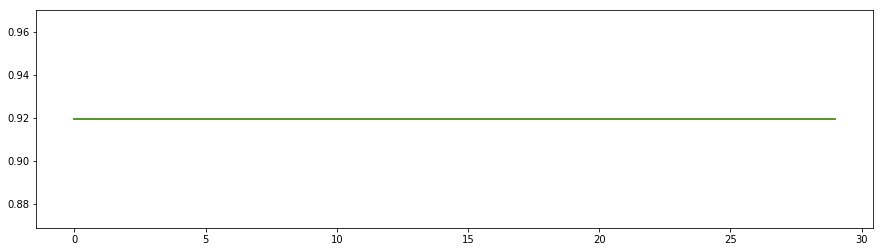

In [116]:
%matplotlib inline

plt.figure(figsize=(15, 4))
for dnn_classifier_setting in dnn_classifier_settings:
    plt.plot(dnn_classifier_setting['history'].history['val_acc'])

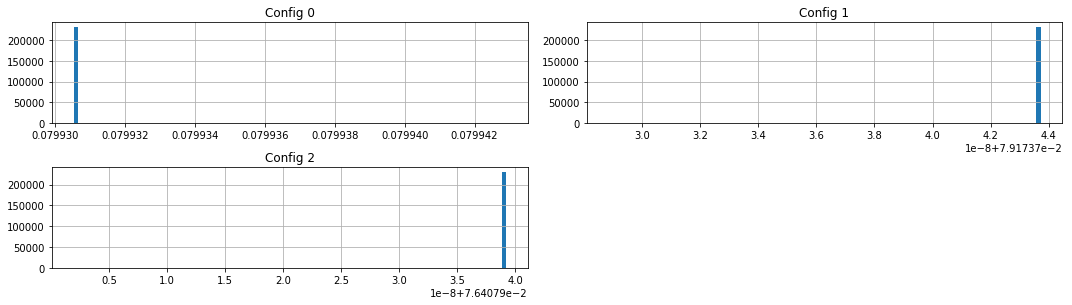

In [117]:
%matplotlib inline

plt.figure(figsize=(15, 20))
for index, setting in enumerate(dnn_classifier_settings):
    plt.subplot(10, 2, index + 1)
    plt.title('Config %d' % index)
    pd.Series(setting['training_predictions_onehot'][:, 1]).hist(bins=100)
plt.tight_layout()

In [118]:
boundary_range = np.linspace(0.01, 0.5, 10)

for boundary in boundary_range:
    training_predictions = dnn_classifier_settings[1]['training_predictions_onehot'] / boundary * 0.5
    validation_predictions = dnn_classifier_settings[1]['validation_predictions_onehot'] / boundary * 0.5
    training_predictions = pd.DataFrame(training_predictions).apply(lambda val: 1.0 if val[1] > 0.5 else 0.0, axis=1)
    validation_predictions = pd.DataFrame(validation_predictions).apply(lambda val: 1.0 if val[1] > 0.5 else 0.0, axis=1)
    print('boundary: %.4f, training AUC score: %.4f, val AUC score: %.4f' % (boundary, metrics.roc_auc_score(training_targets, training_predictions), metrics.roc_auc_score(validation_targets, validation_predictions)))
    
IPython.display.Audio('http://www.pacdv.com/sounds/interface_sound_effects/sound94.wav', autoplay=True)

boundary: 0.0100, training AUC score: 0.5000, val AUC score: 0.5000
boundary: 0.0644, training AUC score: 0.5000, val AUC score: 0.5000
boundary: 0.1189, training AUC score: 0.5000, val AUC score: 0.5000
boundary: 0.1733, training AUC score: 0.5000, val AUC score: 0.5000
boundary: 0.2278, training AUC score: 0.5000, val AUC score: 0.5000
boundary: 0.2822, training AUC score: 0.5000, val AUC score: 0.5000
boundary: 0.3367, training AUC score: 0.5000, val AUC score: 0.5000
boundary: 0.3911, training AUC score: 0.5000, val AUC score: 0.5000
boundary: 0.4456, training AUC score: 0.5000, val AUC score: 0.5000
boundary: 0.5000, training AUC score: 0.5000, val AUC score: 0.5000


# STEP 9 : Model Evaluation

In [ ]:
classifier = dnn_classifier

In [ ]:
training_predictions = classifier.predict(training_data)
print('Classifier: %s - acc: %.4f, auc: %.4f' % (classifier.__class__.__name__,
                                                 metrics.accuracy_score(training_targets, training_predictions),
                                                 metrics.roc_auc_score(training_targets, training_predictions)))

In [ ]:
## training_predictions = classifier.predict(training_data)
print(training_predictions)
if type(classifier) == Sequential:
    training_predictions = pd.DataFrame(training_predictions).apply(lambda val: 1.0 if val[1] > 0.1 else 0.0, axis=1)
    validation_predictions = classifier.predict(validation_data)
    validation_predictions = pd.DataFrame(validation_predictions).apply(lambda val: 1.0 if val[1] > 0.1 else 0.0, axis=1)
else:
    print(training_predictions.max())

In [ ]:
print(metrics.accuracy_score(training_targets, training_predictions))
print(metrics.roc_auc_score(training_targets, training_predictions))
print(metrics.accuracy_score(validation_targets, validation_predictions))
print(metrics.roc_auc_score(validation_targets, validation_predictions))

# STEP 10 : Prepare Output